__Задача 1__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

1. Найдите коэффициенты линейной регрессии с помощью формул для парной 
регрессии, а затем с помощью метода наименьших квадратов.

In [3]:
b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b1

2.620538882402765

In [4]:
b0 = np.mean(scoring) - b1 * np.mean(salary)
b0

444.1773573243596

2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

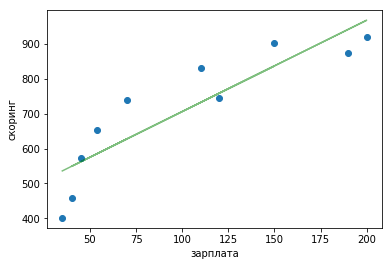

In [5]:
ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='green', alpha=0.5)

plt.xlabel('зарплата')
plt.ylabel('скоринг')
plt.show()

3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.

In [6]:
#коэффициент детерминации
R1 = np.corrcoef(salary, scoring) ** 2
R1

array([[1.        , 0.78763866],
       [0.78763866, 1.        ]])

In [7]:
#массив из предсказанных значений
z = b0 + b1 * salary

In [8]:
#коэффициент детерминации
R2 = z.var() / scoring.var()
R2

0.7876386635293678

In [9]:
#средняя ошибка аппроксимации
A = np.abs((scoring - z) / scoring).mean()
A

0.11469251843561709

4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.


In [10]:
k1 = 1
k2 = 8

In [11]:
T1 = (R2 / (1 - R2)) * (k2 / k1)
T1

29.67164085966437

In [12]:
#Для уровня значимости alpha = 0.05 посчитаем F_crit = F(1, 8)
#Т1>F_crit поэтому уравнение регрессии статистически значимо
from scipy import stats
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

In [13]:
n = salary.shape[0]
upper = ((scoring - z) ** 2).sum() / (n - 2)
lower = ((salary - salary.mean()) ** 2).sum()
s_slope = np.sqrt(upper / lower)

In [14]:
#стандартная ошибка коэффициента наклона
s_slope

0.48108279568516005

Зададим уровень значимости $\alpha = 0.05$. В нашем случае $n = 10$, поэтому нас интересует квантиль $t_{1 - 0.05/2, \: 8} = 2.306$.

In [15]:
t = stats.t.ppf(1 - alpha / 2, df=8)
t

2.3060041350333704

Для коэффициента b1

In [16]:
#Гипотеза - коэффициент b1 = 0.
T = b1 / s_slope
T

5.447168150485579

In [17]:
#Значение попало в критическую область, значит, гипотеза о равенстве нулю параметра b1 отвергается.
#Доверительный интервал для параметра b1:
(b1 - t * s_slope, b1 + t * s_slope)

(1.5111599662593718, 3.729917798546158)

Для коэффициента b0

In [18]:
#Стандартная ошибка коэффициента сдвига
s_intercept = s_slope * np.sqrt((salary ** 2).mean())
s_intercept

56.46649755068153

In [19]:
T = b0 / s_intercept
T

7.866210524668863

In [20]:
#Значение попало в критическую область, значит, значение параметра 𝑏0 является значимым.
#Доверительный интервал для параметра 𝑏0:
(b0 - t * s_intercept, b0 + t * s_intercept)

(313.9653804816363, 574.3893341670829)

__Задача 2__

Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).

In [21]:
db = pd.read_csv('anscombe_dataset.csv', index_col='id')
db

,x1,y1,x2,y2,x3,y3,x4,y4
id,,,,,,,,
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [22]:
b1 = (np.mean(db['x1'] * db['y1']) - np.mean(db['x1']) * np.mean(db['y1'])) / (np.mean(db['x1'] ** 2) - np.mean(db['x1']) ** 2)
a1 = np.mean(db['y1']) - b1 * np.mean(db['x1'])
y1 = a1 + b1 * db['x1']
b1, a1

(0.5000909090909076, 3.0000909090909245)

In [23]:
b2 = (np.mean(db['x2'] * db['y2']) - np.mean(db['x2']) * np.mean(db['y2'])) / (np.mean(db['x2'] ** 2) - np.mean(db['x2']) ** 2)
a2 = np.mean(db['y2']) - b1 * np.mean(db['x2'])
y2 = a2 + b2 * db['x2']
b2, a2

(0.5, 3.0000909090909227)

In [24]:
b3 = (np.mean(db['x3'] * db['y3']) - np.mean(db['x3']) * np.mean(db['y3'])) / (np.mean(db['x3'] ** 2) - np.mean(db['x3']) ** 2)
a3 = np.mean(db['y3']) - b1 * np.mean(db['x3'])
y3 = a3 + b3 * db['x3']
b3, a3

(0.49972727272727013, 2.9991818181818326)

In [25]:
b4 = (np.mean(db['x4'] * db['y4']) - np.mean(db['x4']) * np.mean(db['y4'])) / (np.mean(db['x4'] ** 2) - np.mean(db['x2']) ** 2)
a4 = np.mean(db['y4']) - b1 * np.mean(db['x4'])
y4 = a4 + b4 * db['x4']
b4, a4

(0.4999090909090924, 3.000090909090922)

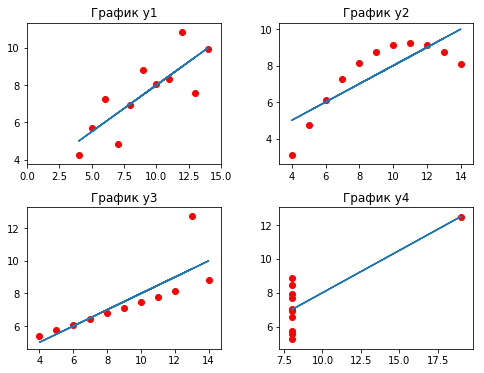

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ay1, ay2, ay3, ay4 = ax.flatten()
ay1.plot(db['x1'], y1)
ay1.scatter(db['x1'], db['y1'], c='red')
ay1.set_title('График y1')
ay1.set_xlim([0,15])

ay2.plot(db['x2'], y2)
ay2.scatter(db['x2'], db['y2'], c='red')
ay2.set_title('График y2')

ay3.plot(db['x3'], y3)
ay3.scatter(db['x3'], db['y3'], c='red')
ay3.set_title('График y3')

ay4.plot(db['x4'], y4)
ay4.scatter(db['x4'], db['y4'], c='red')
ay4.set_title('График y4')

fig.set_size_inches(8, 6)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [27]:
matplotlib.axes.Axes.scatter(db['x1'], db['y1'])

NameError: name 'matplotlib' is not defined